## Observations and Insights 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
housing_data_path = "Austin_housing_data.csv"
census_path = "Census_data.csv"

# Read the housing data and census results
housing_data = pd.read_csv(housing_data_path)
census_results = pd.read_csv(census_path)

# # Combine the data into a single dataset

# merge_df = pd.merge(housing_data, census_results, on="Mouse ID", how="outer")

# # Display the data table for preview
# merge_df

In [103]:
census_results.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [89]:
housing_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [90]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [91]:
housing_data.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [92]:
house_type= housing_data.homeType.value_counts()
house_type

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

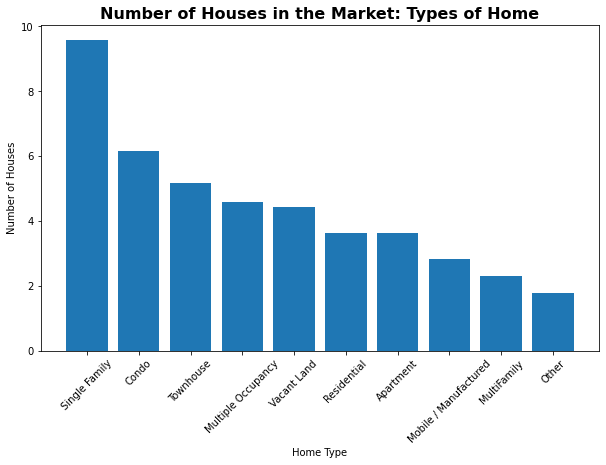

In [93]:
# making a bar graph for the types of home
plt.figure(figsize= (10,6))

plt.bar(house_type.index , np.log(house_type.values))
plt.ylabel('Number of Houses')
plt.xlabel("Home Type")
plt.title("Number of Houses in the Market: Types of Home", fontweight="bold", fontsize=16)
plt.xticks(rotation = 45)
plt.show()

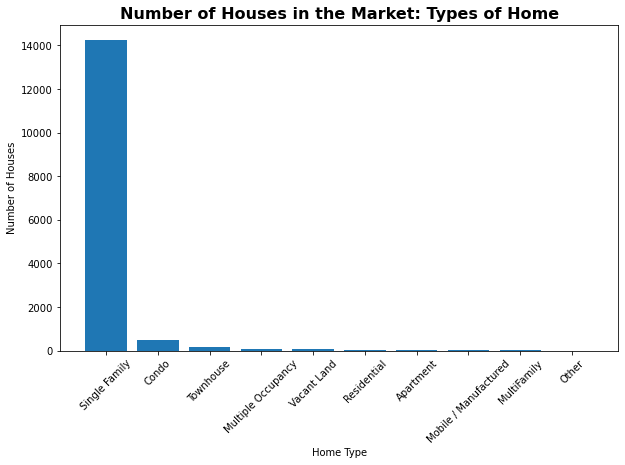

In [94]:
# making a bar graph for the types of home
plt.figure(figsize= (10,6))

plt.bar(house_type.index ,(house_type.values))
plt.ylabel('Number of Houses')
plt.xlabel("Home Type")
plt.title("Number of Houses in the Market: Types of Home", fontweight="bold", fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [95]:
# based on the shape of the histogram, we can see majority of the data come from Single Family home.
# we will drop other types of home and only focus on Single Family homes.

mask = housing_data.homeType == "Single Family"
mask1 = housing_data[mask]
mask1

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg


In [96]:
year_sold= mask1.latest_saleyear.value_counts()
year_sold

2020    5055
2019    4992
2018    4118
2021      76
Name: latest_saleyear, dtype: int64

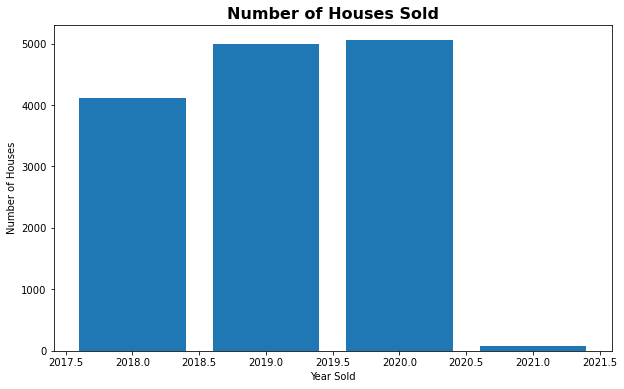

In [97]:
# making a bar graph for the types of home
plt.figure(figsize= (10,6))
plt.bar(year_sold.index ,(year_sold.values))
plt.ylabel('Number of Houses')
plt.xlabel("Year Sold")
plt.title("Number of Houses Sold", fontweight="bold", fontsize=16)
plt.show()

In [98]:
# based on the shape of the histogram for the year the house was sold, we have the least data from 2021. 
# Since 2021 has not been completed, this is our limitation for the incomplete data for 2021. We will remove 2021.


mask2 = mask1.latest_saleyear != 2021
mask3 = mask1[mask2]
mask3

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,1,1,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,1,1,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg


In [99]:
mask3.latest_saleyear

0        2019
1        2020
2        2019
3        2018
4        2018
         ... 
15163    2020
15164    2020
15165    2020
15166    2020
15167    2020
Name: latest_saleyear, Length: 14165, dtype: int64

In [100]:
house_city= mask3.city.value_counts()
house_city

austin              14020
del valle              84
pflugerville           34
driftwood              12
manor                   5
dripping springs        4
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

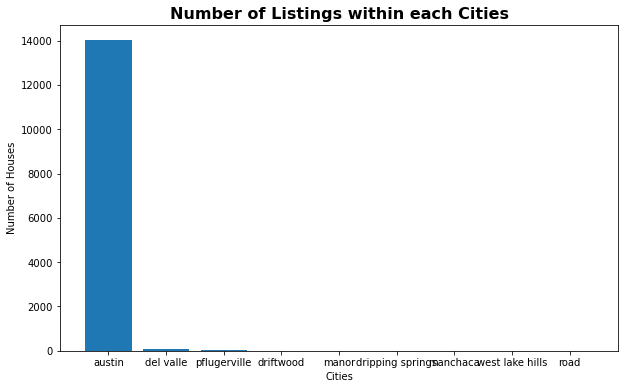

In [101]:
# making a bar graph for the types of home
plt.figure(figsize= (10,6))
plt.bar(house_city.index ,(house_city.values))
plt.ylabel('Number of Houses')
plt.xlabel("Cities")
plt.title("Number of Listings within each Cities", fontweight="bold", fontsize=16)
plt.show()

In [102]:
mask4 = mask3.city == "austin"
mask5 = mask3[mask4]
mask5


# mask = housing_data.homeType == "Single Family"
# mask1 = housing_data[mask]
# mask1

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
17,116080992,austin,10505 Cannon Mark Way,78717,*PLEASE SEE THE WALKTHROUGH VIRTUAL TOUR*This ...,30.486408,-97.794724,2.21,0,True,...,1,1,3.266667,7.666667,1259,14,6.0,5,2,116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...
18,88013985,austin,15524 Staked Plains Loop,78717,Rare opportunity in this high demand area of A...,30.494375,-97.796516,2.21,2,True,...,1,1,1.933333,8.333333,1481,16,4.0,5,2,88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg
19,70344594,austin,15217 Sabal Palm Rd,78724,Charming Home boasting 3 bedrooms and 2 baths....,30.255707,-97.576958,1.98,2,False,...,1,1,2.433333,2.666667,1478,13,2.0,3,1,70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg
20,185217484,austin,14004 Chisos Trl,78717,"COVETED, SPACIOUS 3 bed + OFFICE, 1story MIL P...",30.495638,-97.797874,2.21,0,True,...,1,1,1.900000,8.333333,1481,16,2.0,3,1,185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...
22,116080981,austin,14405 Laurinburg Dr,78717,Popular Bingham Floor plan in sought after Nor...,30.488775,-97.794899,2.21,2,True,...,1,1,3.300000,7.666667,1259,14,5.0,4,2,116080981_b15ecd54b82b93b6af1408beb22e069f-p_f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,1,1,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,1,1,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg


In [104]:
census_results

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43574,...,-17.605427,0.502513,15.035735,-4.614071,-13.140225,-13.762031,-18.484164,-23.515727,-18.743773,-17.065527
3189,50,4,8,56,39,Wyoming,Teton County,21294,21298,21296,...,-1.583464,-2.575509,1.905293,23.259519,12.508872,4.670450,1.253214,-0.171608,-12.432212,1.797445
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21121,21089,...,-9.181105,-18.196975,-4.487730,-10.870861,-15.033634,-10.484550,-11.485101,-18.923455,-13.554993,-9.181105
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8528,8530,...,-7.652085,-12.839390,-3.084589,-1.307811,-18.938032,0.000000,-15.204038,-15.950541,-17.246806,-8.289759


In [116]:
# Generate a line plot for population growth for counties in Austin

# austin_counties = census_results.loc[census_results ["CTYNAME"]=="Bastrop County", "Bexar County", "Caldwell County", "Comal County", "Guadalupe County"
# , "Hays County","Travis County", "Williamson County"]
# austin_counties


cols = ["CTYNAME", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018", "POPESTIMATE2019"]
counties_df = census_results.loc[:, cols]
counties_df.head()


# timepoint = mouse_y793["Timepoint"]
# tumorvolume=mouse_y793["Tumor Volume (mm3)"]

# plt.plot(timepoint, tumorvolume)
# plt.title("Mouse y793 Tumor Volume with Capomulin Treatment")
# plt.xlabel("Timepoint")
# plt.ylabel("Tumor Volume (mm3)")
# plt.figure(figsize=(10,6))

,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Autauga County,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
2,Baldwin County,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
3,Barbour County,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
4,Bibb County,22870,22745,22667,22521,22553,22566,22586,22550,22367,22394


In [117]:
df = census_results.set_index("CTYNAME")
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
CTYNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,40,3,6,1,0,Alabama,4779736,4780125,4785437,4799069,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
Autauga County,50,3,6,1,1,Alabama,54571,54597,54773,55227,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
Baldwin County,50,3,6,1,3,Alabama,182265,182265,183112,186558,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
Barbour County,50,3,6,1,5,Alabama,27457,27455,27327,27341,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
Bibb County,50,3,6,1,7,Alabama,22915,22915,22870,22745,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [ ]:
austin_counties = df.loc[]